## 1. Import necessary libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 2. Load and prepare the Iris dataset

In [2]:
def load_iris_data(class1=0, class2=1, feature1=0, feature2=1):
  
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # Filter for the two selected classes
    mask = np.logical_or(y == class1, y == class2)
    X = X[mask]
    y = y[mask]
    
    # Extract only the two selected features
    X = X[:, [feature1, feature2]]
    
    # Convert labels to binary (0 and 1)
    y = np.where(y == class1, 0, 1)
    
    return X, y


## 3. Perceptron Implementation

In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step_function(linear_output)
                
                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def step_function(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.step_function(x) for x in linear_output])

## 4. Visualization functions

In [4]:
def plot_decision_boundary(X, y, perceptron, title, new_point=None, new_label=None):

    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict for each point in the mesh
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create figure
    plt.figure(figsize=(8, 6))
    
    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Get class names from iris dataset
    iris = load_iris()
    class_names = iris.target_names
    
    # Create scatter plots for each class with labels
    scatter0 = plt.scatter(X[y == 0, 0], X[y == 0, 1], 
                          c='blue', s=30, edgecolor='k', 
                          label=f'Class 0: {class_names[0]}')
    scatter1 = plt.scatter(X[y == 1, 0], X[y == 1, 1], 
                          c='red', s=30, edgecolor='k', 
                          label=f'Class 1: {class_names[1]}')
    
    # Highlight new point if provided
    if new_point is not None and new_label is not None:
        color = 'red' if new_label == 1 else 'blue'
        plt.scatter(new_point[0], new_point[1], 
                   c=color, s=100, edgecolor='k', 
                   marker='*', label='New Added Point')
    
    # Add legend and labels
    plt.legend(loc='upper right')
    plt.title(title)
    plt.xlabel('Sepal Length (cm)' if X.shape[1] == 0 else 'Petal Length (cm)')
    plt.ylabel('Sepal Width (cm)' if X.shape[1] == 1 else 'Petal Width (cm)')
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()

## 5. Experiment 1 - Setosa vs Versicolor (Sepal Length vs Sepal Width)

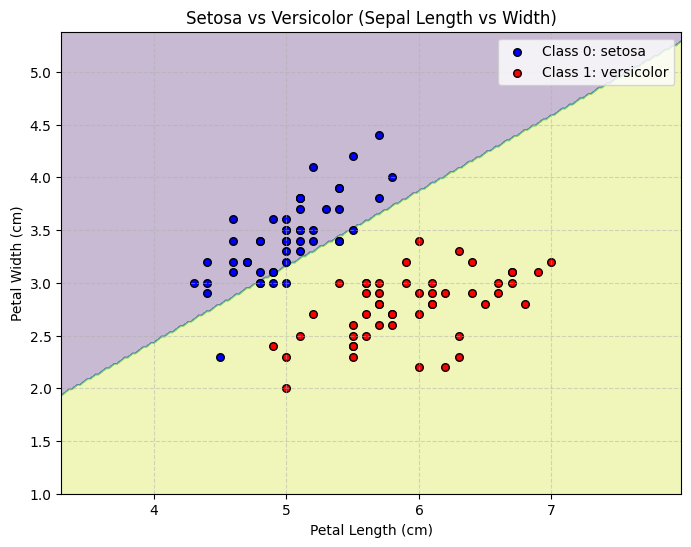

In [5]:
# Load data
X, y = load_iris_data(class1=0, class2=1, feature1=0, feature2=1)

# Train perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, perceptron, "Setosa vs Versicolor (Sepal Length vs Width)")

## 6. Experiment 2 - Different features (Petal Length vs Petal Width)

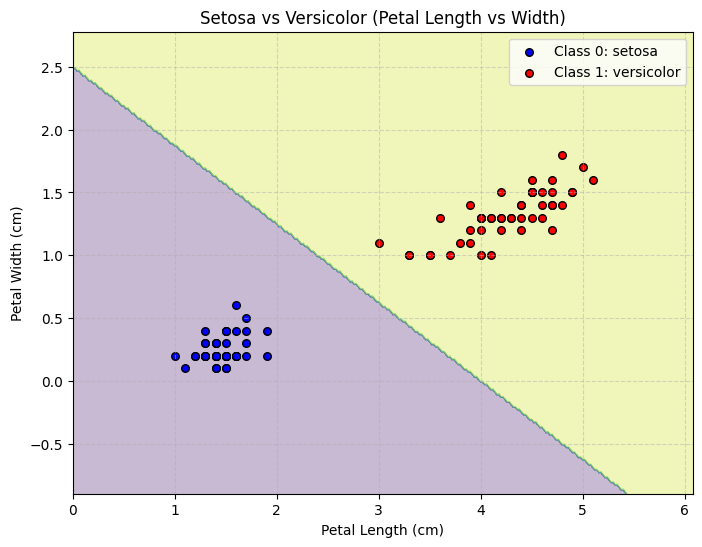

In [6]:
X, y = load_iris_data(class1=0, class2=1, feature1=2, feature2=3)

# Train perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, perceptron, "Setosa vs Versicolor (Petal Length vs Width)")


## 7. Experiment 3 - Different classes (Versicolor vs Virginica)

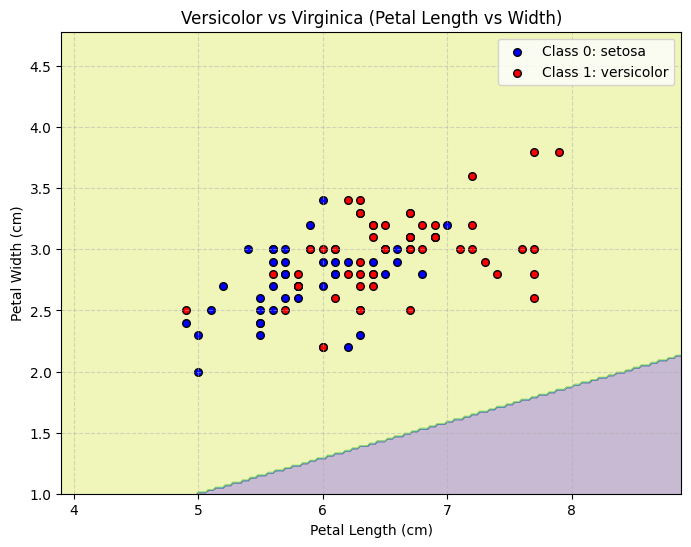

In [7]:
X, y = load_iris_data(class1=1, class2=2, feature1=0, feature2=1)

# Train perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, perceptron, "Versicolor vs Virginica (Petal Length vs Width)")

## 8. Adding a new data point and observing the effect

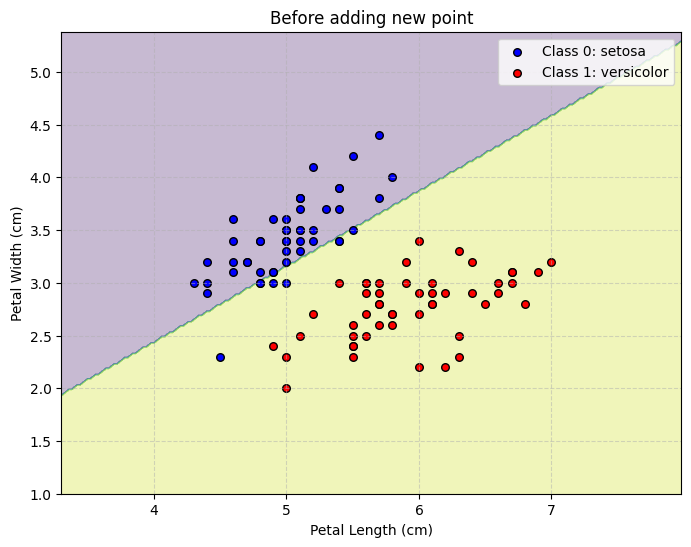

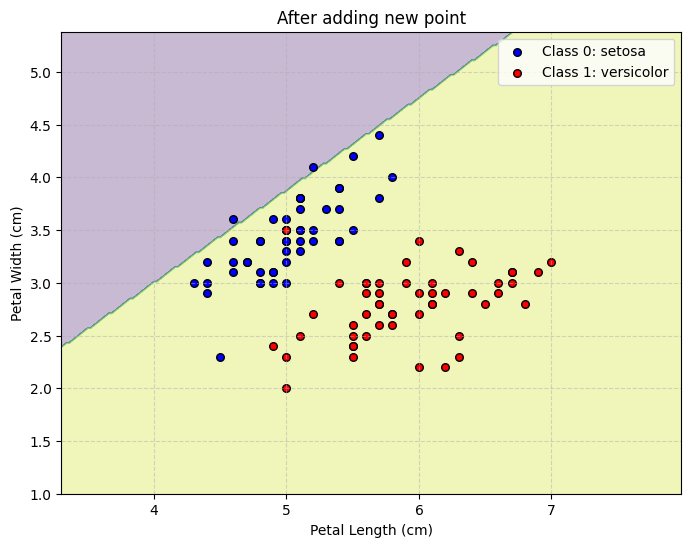

In [8]:
# Let's use Setosa vs Versicolor with sepal length/width first
X, y = load_iris_data(class1=0, class2=1, feature1=0, feature2=1)

# Train initial perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X, y)
plot_decision_boundary(X, y, perceptron, "Before adding new point")

# Add a new point that might affect the boundary
new_point = np.array([[5.0, 3.5]])  # Near the boundary
new_label = np.array([1])  # Versicolor

# Add to dataset
X_new = np.vstack((X, new_point))
y_new = np.hstack((y, new_label))

# Retrain perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X_new, y_new)

# Plot new decision boundary
plot_decision_boundary(X_new, y_new, perceptron, "After adding new point")